<h1>Bike Sharing Dataset using Decision Tree Regressor


<B>This is Supervised problem as the output datasets are provided and I used this to predict the future outcomes of target variable.
    
This is regression problem as dependent variable i.e. Bike Rental Count is continuous values or ordered whole values. Regression means to predict the output value using training data.


<B>Based on Bike Sharing dataset from UCI Machine Learning Repository
This notebook is based upon the hourly data file, i.e. hour.csv
This notebook showcases regression using Decision Trees

<h3>Problem Statement

Given the Bike Sharing dataset with hourly level information of bikes along with weather, User type Registered/Casual and other attributes, model a system which can predict the bike count.

<h1>Import required packages

In [1]:
%matplotlib inline

# data manuipulation
import numpy as np
import pandas as pd

# modeling utilities
import pydotplus 
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# plotting libraries
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sn


sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [2]:
#Importing the dataset
stats = pd.read_csv('hour.csv')

In [3]:
#Shape of dataset
stats.shape

(17379, 17)

<h1>The dataset contains more than 17K records with 17 features 

In [4]:
# top 3 rows from the dataset
stats.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


<h1> Data Wrangling

In [5]:
#finding if any nulls and data types of the features
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<h3> Renaming the columns, Type casting the attributes 

In [6]:
stats.rename(columns = {'instant': 'rec_id',
                       'dteday':'datetime',
                       'holiday': 'is_holiday',
                       'workingday': 'is_workingday',
                       'weathersit': 'weather_condition',
                       'hum': 'humidity', 
                       'mnth': 'month',
                       'cnt': 'total_count',
                       'hr': 'hour',
                       'yr': 'year'}, inplace = True)

In [7]:
#type casting the attributes
stats['datetime'] = pd.to_datetime(stats.datetime)#dae time conversion
# categorical variables
stats['season'] = stats.season.astype('category')
stats['is_holiday'] = stats.is_holiday.astype('category')
stats['weekday'] = stats.weekday.astype('category')
stats['weather_condition'] = stats.weather_condition.astype('category')
stats['is_workingday'] = stats.is_workingday.astype('category')
stats['month'] = stats.month.astype('category')
stats['year'] = stats.year.astype('category')
stats['hour'] = stats.hour.astype('category')

<h1> Decision Tree Regression on All the Features

In [8]:
# Fitting the DEcision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
X, X_test, y, y_test = train_test_split(stats.iloc[:,2:-3], stats.iloc[:,16], 
                                                    test_size=0.33, random_state=42)

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [9]:
y_pred = regressor.predict(X_test)
y_pred

array([360., 103.,   9., ..., 182., 563., 136.])

In [10]:
print (X)

      season year month hour is_holiday weekday is_workingday  \
5749       3    0     9    0          0       5             1   
1843       2    0     3   13          0       2             1   
13855      3    1     8   12          0       0             0   
9723       1    1     2    2          0       3             1   
10981      2    1     4   17          0       6             0   
1285       1    0     2   17          0       6             0   
16759      4    1    12    2          0       4             1   
4303       3    0     7    5          0       0             0   
6366       4    0     9   20          0       2             1   
1941       2    0     3   16          0       6             0   
16397      4    1    11   23          0       2             1   
1091       1    0     2    5          0       5             1   
6891       4    0    10   18          0       3             1   
73         1    0     1    5          0       2             1   
3397       2    0     5  

In [11]:
regressor.score(X_test, y_test)

0.8857883669426379

The default scoring mechanism for any Regression ML model is R2. This metric quantifies the amount of variance in the target variable that is predicted from the feautre variable. I find this score far better than the score I got with Linear Regression. 

<h1> Cross Validation 5-folds

To avoid the prediction of target variable by the split % of train & test data, Cross validation method is introduced to group the data into 5(or K) folds and performing train-test split & prediction on each fold iteratively and we predict the value of R2 5 times. Then from here we may compute Mean, Median or 95% Confidence Interval.

In [12]:
from sklearn.model_selection import cross_val_score
#reg = linear_model.LinearRegression()
cv_results = cross_val_score(regressor.fit(X,y), X_test, y_test, cv= 5)
print(cv_results)

[0.87212515 0.83738118 0.85254783 0.86757887 0.86173096]


In [13]:
np.mean(cv_results)

0.8582727961896776

In [14]:
r2_scores = cross_val_score(regressor.fit(X,y), X_test, y_test, cv=5)
mse_scores = cross_val_score(regressor.fit(X,y), X_test, y_test, cv=5,scoring='neg_mean_squared_error')

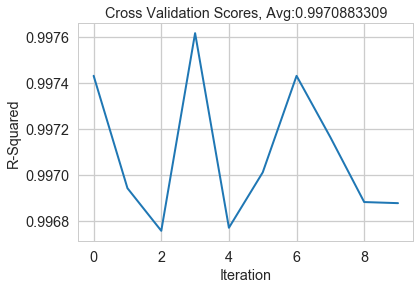

In [50]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

In [16]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))
# print("R-Squared::{}".format(grid_cv_dtr.best_score_))
# print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-squared::[0.87212515 0.83738118 0.85254783 0.86757887 0.86173096]
MSE::[-3813.68031359 -5214.48496077 -4904.86312119 -4390.91891892
 -4304.16325196]


<b> On applying cross validation R2 average is lowered to 0.86 from 0.885 Decision Tree regressor score. This may be due to overfitting.

<h1>Regularized Ridge Regression in Scikit-Learn

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha =0.1, normalize=True)
ridge.fit(X, y)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.39024245916347916

In [18]:
print (X)

      season year month hour is_holiday weekday is_workingday  \
5749       3    0     9    0          0       5             1   
1843       2    0     3   13          0       2             1   
13855      3    1     8   12          0       0             0   
9723       1    1     2    2          0       3             1   
10981      2    1     4   17          0       6             0   
1285       1    0     2   17          0       6             0   
16759      4    1    12    2          0       4             1   
4303       3    0     7    5          0       0             0   
6366       4    0     9   20          0       2             1   
1941       2    0     3   16          0       6             0   
16397      4    1    11   23          0       2             1   
1091       1    0     2    5          0       5             1   
6891       4    0    10   18          0       3             1   
73         1    0     1    5          0       2             1   
3397       2    0     5  

<h1> Lasso Regression in Scikit-Learn

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha =0.1, normalize=True)
lasso.fit(X, y)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.3779824852159332

In [20]:
print ((X))

      season year month hour is_holiday weekday is_workingday  \
5749       3    0     9    0          0       5             1   
1843       2    0     3   13          0       2             1   
13855      3    1     8   12          0       0             0   
9723       1    1     2    2          0       3             1   
10981      2    1     4   17          0       6             0   
1285       1    0     2   17          0       6             0   
16759      4    1    12    2          0       4             1   
4303       3    0     7    5          0       0             0   
6366       4    0     9   20          0       2             1   
1941       2    0     3   16          0       6             0   
16397      4    1    11   23          0       2             1   
1091       1    0     2    5          0       5             1   
6891       4    0    10   18          0       3             1   
73         1    0     1    5          0       2             1   
3397       2    0     5  

In [21]:
type((min(X)))

str

<H1> ONE HOT ENCODING - The Categorical Features

In [22]:
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
        column.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded

    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series

    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name]) 
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

<h1> Train Test Split

In [23]:
X, X_test, y, y_test = train_test_split(stats.iloc[:,2:-1], stats.iloc[:,-1], 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


In [24]:
print (X.head(10))

   index season year month hour is_holiday weekday is_workingday  \
0   5749      3    0     9    0          0       5             1   
1   1843      2    0     3   13          0       2             1   
2  13855      3    1     8   12          0       0             0   
3   9723      1    1     2    2          0       3             1   
4  10981      2    1     4   17          0       6             0   
5   1285      1    0     2   17          0       6             0   
6  16759      4    1    12    2          0       4             1   
7   4303      3    0     7    5          0       0             0   
8   6366      4    0     9   20          0       2             1   
9   1941      2    0     3   16          0       6             0   

  weather_condition  temp   atemp  humidity  windspeed  casual  registered  
0                 1  0.64  0.6061      0.65     0.1940       6          58  
1                 1  0.50  0.4848      0.45     0.2239      21          85  
2                 1 

In [25]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year', 'casual', 'registered']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [26]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})

In [27]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 21)


<h1> Decision Tree based Regression

In [28]:
X = train_df_new
y= y.total_count.values.reshape(-1,1)

In [29]:
X.shape,y.shape

((11643, 21), (11643, 1))

<h1> Sample Decision Tree Regressor

In [30]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
dtr.score(X,y)

0.957862935392204

Returns the coefficient of determination R^2 of the prediction.
The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

<h1> Grid Search With Cross Validation

In [32]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

This examples shows how a classifier is optimized by cross-validation, which is done using the sklearn.model_selection.GridSearchCV object on a development set that comprises only half of the available labeled data.
The performance of the selected hyper-parameters and trained model is then measured on a dedicated evaluation set that was not used during the model selection step.

In [33]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [34]:
grid_cv_dtr.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [10, 20, 40], 'max_leaf_nodes': [5, 20, 100, 500, 800], 'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8], 'min_samples_leaf': [20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

<h1> Cross Validation: Best Model Details

In [35]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.996848172075
Best Hyperparameters::
{'min_samples_split': 10, 'max_leaf_nodes': 500, 'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 20}


In [36]:
df = pd.DataFrame(data=grid_cv_dtr.cv_results_)
df.head()

/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.029016,0.006371,0.893902,0.897234,mse,2,5,20,10,"{u'min_samples_split': 10, u'max_leaf_nodes': ...",...,0.895944,0.900776,0.890879,0.89531,0.896657,0.896898,0.002453,0.000591,0.002126,0.001935
1,0.029222,0.005823,0.893902,0.897234,mse,2,5,20,20,"{u'min_samples_split': 20, u'max_leaf_nodes': ...",...,0.895944,0.900776,0.890879,0.89531,0.896657,0.896898,0.001273,0.001252,0.002126,0.001935
2,0.030990,0.006143,0.893902,0.897234,mse,2,5,20,40,"{u'min_samples_split': 40, u'max_leaf_nodes': ...",...,0.895944,0.900776,0.890879,0.89531,0.896657,0.896898,0.001687,0.001080,0.002126,0.001935
3,0.036737,0.007710,0.893902,0.897234,mse,2,5,40,10,"{u'min_samples_split': 10, u'max_leaf_nodes': ...",...,0.895944,0.900776,0.890879,0.89531,0.896657,0.896898,0.003125,0.001422,0.002126,0.001935
4,0.031816,0.006938,0.893902,0.897234,mse,2,5,40,20,"{u'min_samples_split': 20, u'max_leaf_nodes': ...",...,0.895944,0.900776,0.890879,0.89531,0.896657,0.896898,0.001374,0.001608,0.002126,0.001935


[Text(0.5,1,u'Effect of Depth and Leaf Nodes on Model Performance')]

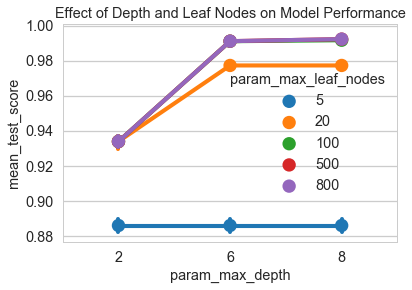

In [37]:
fig,ax = plt.subplots()
sn.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

<h1> Residual Plot

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.
A residual is the difference between the observed y-value (from scatter plot) and the predicted y-value (from regression equation line). It is the vertical distance from the actual plotted point to the point on the regression line.

In [38]:
predicted = grid_cv_dtr.best_estimator_.predict(X)
residuals = y.flatten()-predicted

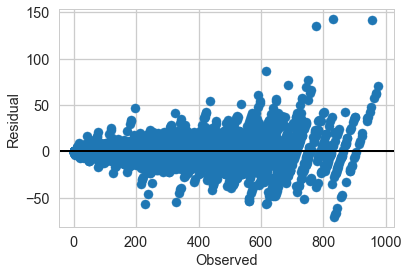

In [39]:
fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

By default cross_val_score uses the scoring provided in the given estimator, which is usually the simplest appropriate scoring method. E.g. for most classifiers this is accuracy score and for regressors this is r2 score.
the score computed at each CV iteration is the score method of the estimator

In [40]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

In [41]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

avg R-squared::0.9970883309
MSE::-97.2412988469


<h3> Setting the model for Testing

In [42]:
best_dtr_model = grid_cv_dtr.best_estimator_

<h1> Test Dataset Performance

In [43]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,le,ohe,col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] for enc in test_encoded_attr_list if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 21)


In [44]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

In [45]:
y_pred = best_dtr_model.predict(X_test)
residuals = y_test.flatten() - y_pred

In [46]:
r2_score = best_dtr_model.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

R-squared::0.997286859807
MSE: 86.55


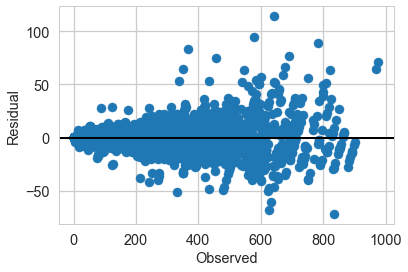

In [47]:
fig, ax = plt.subplots()
ax.scatter(y_test.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

r2_score = grid_cv_dtr.best_estimator_.score(X_test,y_test)